### Read tree data

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point
import matplotlib.pyplot as plt

In [2]:
# Read tree data from CSV file
tree_data = pd.read_csv('./data/NewYork_Final_2022-06-18.csv')
tree_data.head(3)

,city_ID,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,...,planted_date,retired_date,neighborhood,location_name,ward,district,overhead_utility,height_M,height_binned_M,percent_population
0,"180,683",8/27/2015,inventory_date,Red maple,Acer rubrum,New York,New York,-73.844215,40.723092,no_info,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"200,540",9/3/2015,inventory_date,Pin oak,Quercus palustris,New York,New York,-73.818679,40.794111,no_info,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"204,026",9/5/2015,inventory_date,Honeylocust,Gleditsia triacanthos,New York,New York,-73.936608,40.717581,no_info,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tree_data.dtypes

city_ID                              object
most_recent_observation              object
most_recent_observation_type         object
common_name                          object
scientific_name                      object
city                                 object
state                                object
longitude_coordinate                float64
latitude_coordinate                 float64
location_type                        object
zipcode                               int64
address                              object
diameter_breast_height_CM           float64
condition                            object
native                               object
diameter_breast_height_binned_CM     object
greater_metro                        object
tree_ID                             float64
planted_date                        float64
retired_date                        float64
neighborhood                        float64
location_name                       float64
ward                            

### Filter the tree data based on missing values of longitude and latitude

In [4]:
# Filter out rows with missing geometry values
filtered_tree_data = tree_data.dropna(subset=['longitude_coordinate'])
filtered_tree_data = tree_data.dropna(subset=['latitude_coordinate'])

# Get the number of rows before and after filtering
original_count = tree_data.shape[0]
filtered_count = filtered_tree_data.shape[0]

# Calculate the percentage of rows removed
removed_percentage = ((original_count - filtered_count) / original_count) * 100

print("Original number of rows:", original_count)
print("Number of rows after filtering for missing city field:", filtered_count)
print("Percentage of rows removed:", removed_percentage, "%")

# Replace tree_data with the cleaned data
tree_data = filtered_tree_data

Original number of rows: 683788
Number of rows after filtering for missing city field: 683788
Percentage of rows removed: 0.0 %


### Create geometry column and keep selected columns only

In [5]:
geometry = [Point(xy) for xy in zip(tree_data.longitude_coordinate, tree_data.latitude_coordinate)]

tree_data = gpd.GeoDataFrame(tree_data, geometry=geometry)[
    ['most_recent_observation', 'common_name', 'city', 'condition', 'geometry']
    ]

tree_data.crs = 4326

In [6]:
tree_data.head(3)

,most_recent_observation,common_name,city,condition,geometry
0,8/27/2015,Red maple,New York,fair,POINT (-73.84422 40.72309)
1,9/3/2015,Pin oak,New York,fair,POINT (-73.81868 40.79411)
2,9/5/2015,Honeylocust,New York,good,POINT (-73.93661 40.71758)


### Apply the local crs to tree data

In [7]:
tree_data_local = tree_data.to_crs('EPSG:2263') # 2263 in NY

### Visualize the tree data local dataset

(np.float64(905654.5690912126),
 np.float64(1074942.5809359222),
 np.float64(113427.87215276818),
 np.float64(279440.2573808699))

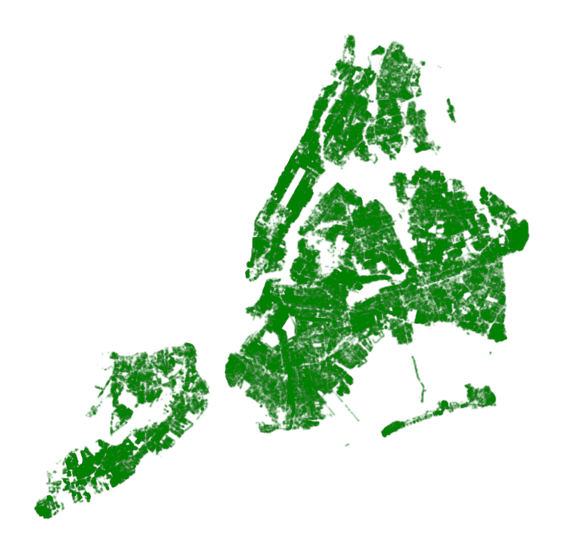

In [8]:
f, ax = plt.subplots(1,1,figsize=(7,7))

tree_data_local.plot(ax=ax, color = 'green', markersize = 0.5, alpha = 0.025)
ax.axis('off')

### Export trees to shapefile

In [9]:
tree_data_local.to_file('./output_data/trees.shp', driver='ESRI Shapefile')

/var/folders/5v/3v8mh16j7snblch4yq9p4y600000gn/T/ipykernel_2613/13604462.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tree_data_local.to_file('./output_data/trees.shp', driver='ESRI Shapefile')
/Users/dimi_bil/anaconda3/envs/geo3.9/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'most_recent_observation' to 'most_recen'
  ogr_write(
/Users/dimi_bil/anaconda3/envs/geo3.9/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'common_name' to 'common_nam'
  ogr_write(
